In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
import pickle

In [2]:
data = pd.read_csv("TaxiTrip2021Subset.csv")

train = data.sample(frac=0.8)
test = data.drop(train.index).sample(frac=1.0)

In [3]:
trainX = train[['Trip Seconds', 'Trip Miles', 'Fare']]
trainY = train['Tips']
testX = test[['Trip Seconds', 'Trip Miles', 'Fare']]
testY = test['Tips']

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(max_depth=10, random_state=0)
rfr.fit(trainX,trainY)

RandomForestRegressor(max_depth=10, random_state=0)

In [15]:
rfr_predY = rfr.predict(testX)
rmse = math.sqrt(mean_squared_error(testY,rfr_predY))
print("RMSE: " + "{:.2f}".format(rmse))

RMSE: 2.98


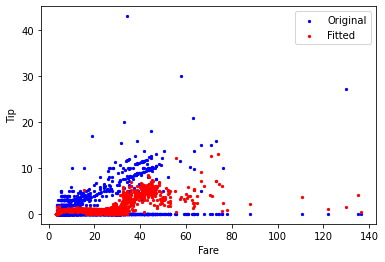

In [10]:
plt.scatter(testX['Fare'], testY, s=5, color='blue', label="Original")
plt.scatter(testX['Fare'], rfr_predY, s=5, color="red", label="Fitted")
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.show()

In [7]:
pickle.dump(rfr, open('RFR_Model.sav', 'wb'))